In [1]:
!pip install tadasets
!pip install ripser
!pip install persim
!pip install gudhi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.3 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=c0d12f4b8392e2e6f3ffb4b20df5026c284b3476e4a446e9534a8e8208881a2f
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import tadasets # for generating sample data
import ripser # for computing persistence diagrams
import persim # for comparing persistence diagrams
import gudhi as gd # for computing persistence diagrams
import plotly.graph_objects as go # for plotting persistence diagrams

### Ejercicio 1.4:

Selecciona dos tipos de nubes de puntos y construye sus diagramas de persistencia para dos filtraciones diferentes (parametro `max_edge_length`). Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein.

Una vez comparado, ¿qué pasa si modificamos el parámetro noise en la generación de los datos? Para esto, utiliza un mismo tipo de nube de puntos y varía el parámetro `noise` en la función `tadasets.make_*`. Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein. ¿Qué observas? ¿Qué tipo de ruido afecta más a la homología persistente? ¿Por qué?

In [43]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 14.6 MB/s eta 0:00:00


In [70]:
from gudhi.wasserstein import wasserstein_distance

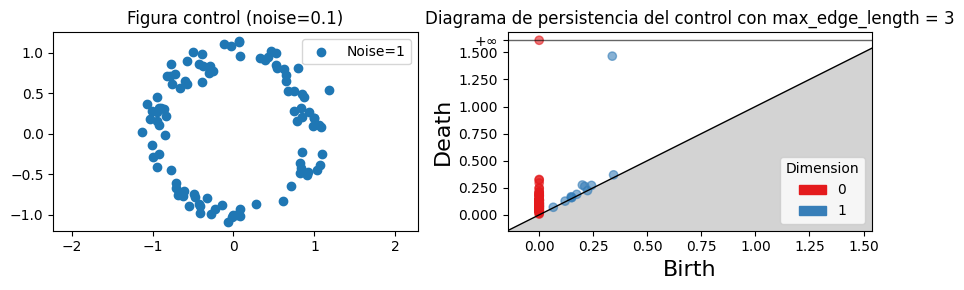

In [88]:
np.random.seed(4242) #puedes cambiar de semilla aleatoria a voluntad

fig, axes = plt.subplots(1, 2, figsize=(9, 3))
circulo1 = tadasets.dsphere(d=1, n=100, r=1, noise=0.1)
axes[0].scatter(circulo1[:, 0], circulo1[:, 1], label="Noise=1")
axes[0].axis('equal')
axes[0].legend()
axes[0].set_title('Figura control (noise=0.1)')

rips_complex = gd.RipsComplex(points=circulo1, max_edge_length=3)
ref_simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
ref_diag = ref_simplex_tree.persistence()
gd.plot_persistence_diagram(ref_diag, axes=axes[1])
axes[1].set_title(f'Diagrama de persistencia del control con max_edge_length = 3')
plt.tight_layout()
plt.show()

persistence_ref = np.array([ref_diag[i][1] for i in range(len(ref_diag))])


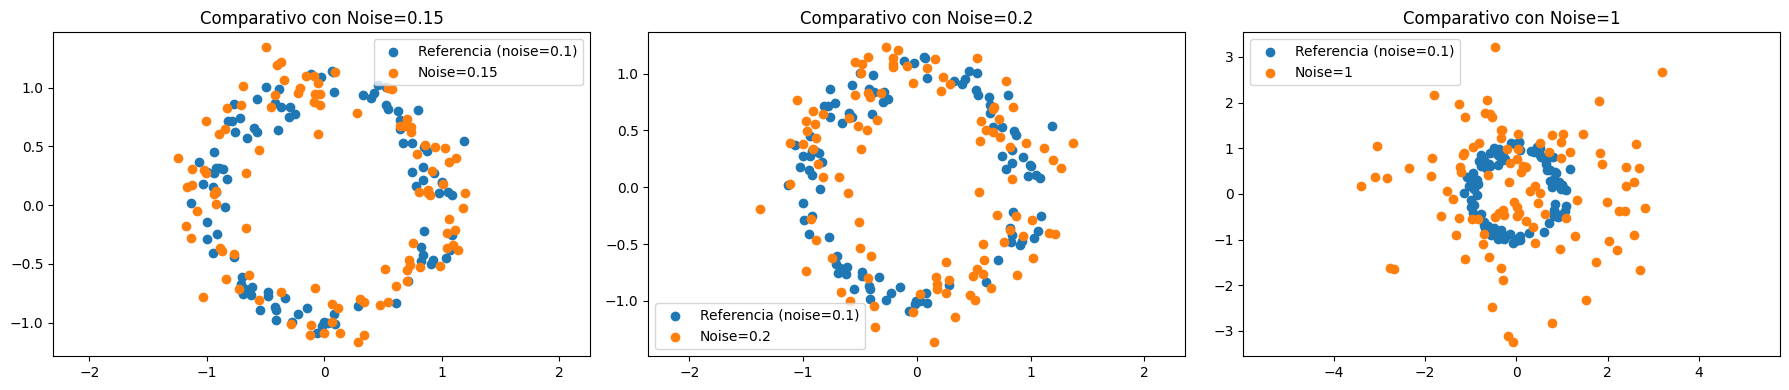

In [89]:
np.random.seed(4242) #puedes cambiar de semilla aleatoria a voluntad
noises = [0.15, 0.2, 1]
circulos= []
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
# Iterate through noises and plot on subplots
for idx, noise in enumerate(noises):
    circulo2 = tadasets.dsphere(d=1, n=100, r=1, noise=noise)
    # Use the corresponding subplot
    axes[idx].scatter(circulo1[:, 0], circulo1[:, 1], label="Referencia (noise=0.1)")
    axes[idx].scatter(circulo2[:, 0], circulo2[:, 1], label=f"Noise={noise}")
    axes[idx].axis('equal')
    axes[idx].legend()
    axes[idx].set_title(f'Comparativo con Noise={noise}')
    circulos.append(circulo2)

# Adjust layout and show final figure
plt.tight_layout()
plt.show()





/usr/local/lib/python3.11/dist-packages/gudhi/wasserstein/wasserstein.py:210: UserWarning: Cardinality of essential parts differs. Distance (cost) is +inf.
  warnings.warn(f'{user_warning} Distance (cost) is +inf.')


Bottleneck distance when Noise= 0.15 and max_edge_l = 1: inf
Wasserstein distance when Noise= 0.15 and max_edge_l = 1: inf

Bottleneck distance when Noise= 0.15 and max_edge_l = 4: 0.1878765517959884
Wasserstein distance when Noise= 0.15 and max_edge_l = 4: 2.620465760899924

Bottleneck distance when Noise= 0.15 and max_edge_l = 8: 0.1878765517959884
Wasserstein distance when Noise= 0.15 and max_edge_l = 8: 2.620465760899924

Bottleneck distance when Noise= 0.2 and max_edge_l = 1: inf
Wasserstein distance when Noise= 0.2 and max_edge_l = 1: inf

Bottleneck distance when Noise= 0.2 and max_edge_l = 4: 0.3649437169660732
Wasserstein distance when Noise= 0.2 and max_edge_l = 4: 4.711581312317728



/usr/local/lib/python3.11/dist-packages/gudhi/wasserstein/wasserstein.py:210: UserWarning: Cardinality of essential parts differs. Distance (cost) is +inf.
  warnings.warn(f'{user_warning} Distance (cost) is +inf.')


Bottleneck distance when Noise= 0.2 and max_edge_l = 8: 0.3649437169660732
Wasserstein distance when Noise= 0.2 and max_edge_l = 8: 4.711581312317728

Bottleneck distance when Noise= 1 and max_edge_l = 1: inf
Wasserstein distance when Noise= 1 and max_edge_l = 1: inf

Bottleneck distance when Noise= 1 and max_edge_l = 4: 0.7531299160426248
Wasserstein distance when Noise= 1 and max_edge_l = 4: 23.68095759454983



/usr/local/lib/python3.11/dist-packages/gudhi/wasserstein/wasserstein.py:210: UserWarning: Cardinality of essential parts differs. Distance (cost) is +inf.
  warnings.warn(f'{user_warning} Distance (cost) is +inf.')


Bottleneck distance when Noise= 1 and max_edge_l = 8: 0.7531299160426248
Wasserstein distance when Noise= 1 and max_edge_l = 8: 23.68095759454983



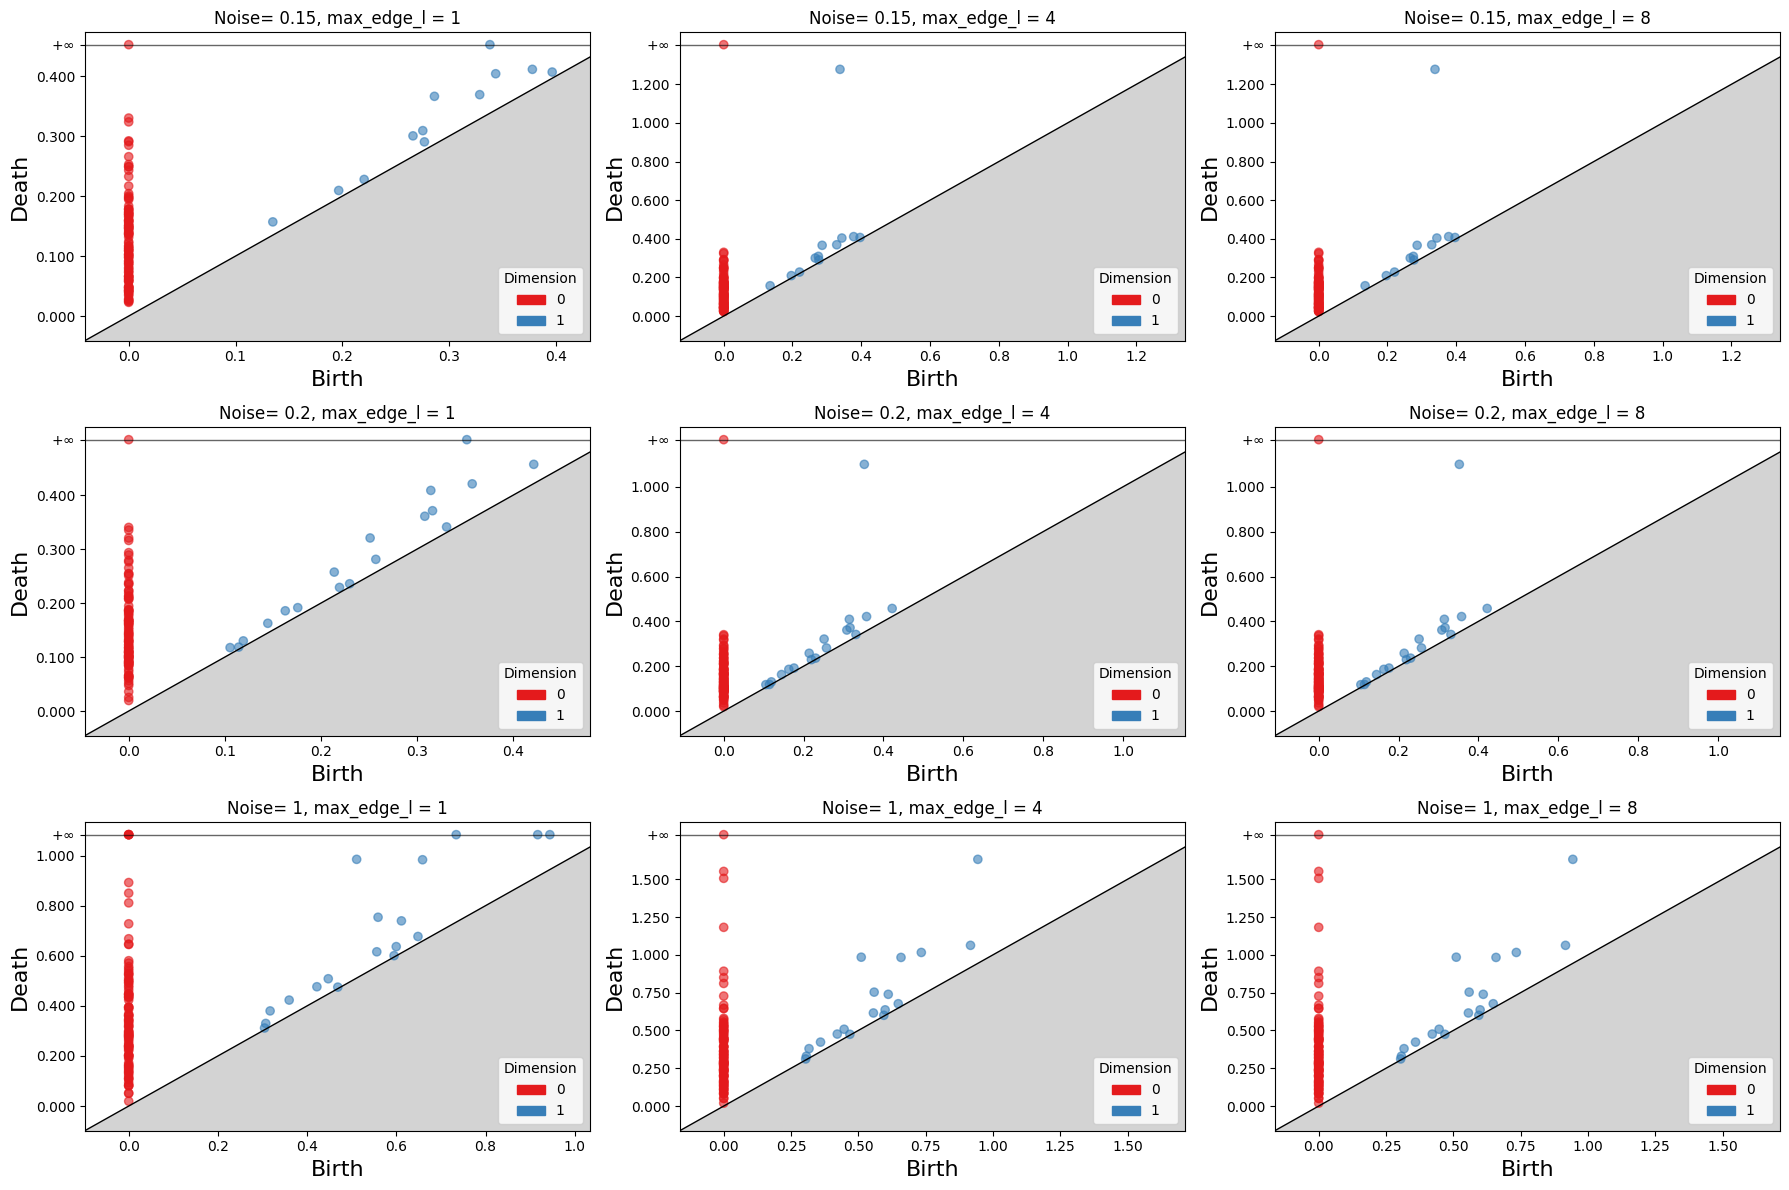

In [91]:
max_edges = [1, 4, 8]
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

simplex_trees = []
diagrams= []

for i, circulo in enumerate(circulos):
    for j, max_edge in enumerate(max_edges):
        rips_complex = gd.RipsComplex(points=circulo, max_edge_length=max_edge)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        gd.plot_persistence_diagram(diag, axes=axes[i, j])
        axes[i, j].set_title(f"Noise= {noises[i]}, max_edge_l = {max_edge}")
        diagrams.append((max_edge, diag))
        persistance2= np.array([diag[i][1] for i in range(len(diag))])
        bottleneck = gd.bottleneck_distance(persistence_ref, persistance2)
        w_dist = wasserstein_distance(persistence_ref, persistance2, order=1 ,internal_p=2)
        print(f"Bottleneck distance when Noise= {noises[i]} and max_edge_l = {max_edge}: {bottleneck}")
        print(f"Wasserstein distance when Noise= {noises[i]} and max_edge_l = {max_edge}: {w_dist}\n")

plt.tight_layout()
plt.show()


De manera preliminar parece que el parámetro de mayor peso es el parámetro del radio de la filtración, pues cuando las distancias son pequeñas el tipo de ruido generado hace que la comparación sea inutil al truncar la filtración antes de que esta pueda identificar todas las posibles homologías en los espacios